<a href="https://colab.research.google.com/github/Manohar7781/Manohar7781/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [10]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [11]:
df_train.shape

(161851, 6)

In [12]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          1
onpromotion    1
dtype: int64

In [ ]:
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161851 entries, 0 to 161850
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           161851 non-null  int64  
 1   date         161851 non-null  object 
 2   store_nbr    161851 non-null  int64  
 3   family       161851 non-null  object 
 4   sales        161850 non-null  float64
 5   onpromotion  161850 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.4+ MB


In [14]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,161851.000000,161851.000000,161850.000000,161850.0
mean,80925.000000,27.493281,196.262464,0.0
std,46722.503547,15.569197,666.997216,0.0
min,0.000000,1.000000,0.000000,0.0
25%,40462.500000,14.000000,0.000000,0.0
50%,80925.000000,27.000000,0.000000,0.0
75%,121387.500000,41.000000,87.617250,0.0
max,161850.000000,54.000000,26067.000000,0.0


In [ ]:
df_train['id'].describe()

count    81886.000000
mean     40942.500000
std      23638.596409
min          0.000000
25%      20471.250000
50%      40942.500000
75%      61413.750000
max      81885.000000
Name: id, dtype: float64

In [ ]:
df_train['id'].fillna(df_train['id'].mean(),inplace=True)
df_test['id'].fillna(df_test['id'].mean(),inplace=True)

In [ ]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    1
dtype: int64

In [ ]:
df_train['id'].describe()

count    81886.000000
mean     40942.500000
std      23638.596409
min          0.000000
25%      20471.250000
50%      40942.500000
75%      61413.750000
max      81885.000000
Name: id, dtype: float64

In [ ]:
df_train['family'].value_counts()

AUTOMOTIVE                    2482
CLEANING                      2482
BABY CARE                     2482
GROCERY I                     2482
EGGS                          2482
DELI                          2482
DAIRY                         2482
FROZEN FOODS                  2482
CELEBRATION                   2482
BREAD/BAKERY                  2482
BOOKS                         2482
BEVERAGES                     2482
BEAUTY                        2482
MAGAZINES                     2481
SCHOOL AND OFFICE SUPPLIES    2481
PRODUCE                       2481
PREPARED FOODS                2481
POULTRY                       2481
PLAYERS AND ELECTRONICS       2481
PET SUPPLIES                  2481
PERSONAL CARE                 2481
MEATS                         2481
HOME AND KITCHEN II           2481
LIQUOR,WINE,BEER              2481
LINGERIE                      2481
LAWN AND GARDEN               2481
LADIESWEAR                    2481
HOME CARE                     2481
HOME APPLIANCES     

In [ ]:
df_train['family'].mode()

0       AUTOMOTIVE
1        BABY CARE
2           BEAUTY
3        BEVERAGES
4            BOOKS
5     BREAD/BAKERY
6      CELEBRATION
7         CLEANING
8            DAIRY
9             DELI
10            EGGS
11    FROZEN FOODS
12       GROCERY I
Name: family, dtype: object

In [ ]:
df_train['family'].fillna(df_train['family'].mode()[0],inplace=True)
df_test['family'].fillna(df_test['family'].mode()[0],inplace=True)

In [25]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    1
dtype: int64

In [ ]:
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [26]:
df_train.drop(['id'],axis=1,inplace=True)
df_test.drop(['id'],axis=1,inplace=True)

In [27]:
df_train

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0.0
1,2013-01-01,1,BABY CARE,0.000,0.0
2,2013-01-01,1,BEAUTY,0.000,0.0
3,2013-01-01,1,BEVERAGES,0.000,0.0
4,2013-01-01,1,BOOKS,0.000,0.0
...,...,...,...,...,...
81881,2013-02-15,7,DAIRY,812.000,0.0
81882,2013-02-15,7,DELI,174.712,0.0
81883,2013-02-15,7,EGGS,286.000,0.0
81884,2013-02-15,7,FROZEN FOODS,153.520,0.0


In [31]:
!pip install -U dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 51.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━

In [2]:
import dtale

In [15]:
dtale.show(df_train)

http://d751772e6ad3:40000/dtale/main/1

In [17]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=84b52e0620a551f1a91d47af33406069744907052f8b69ff6a7a8d7a33946b2b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempt

In [18]:
from pandas_profiling import ProfileReport

2023-05-07 16:40:23,578 - INFO     - Pandas backend loaded 1.5.3
2023-05-07 16:40:23,589 - INFO     - Numpy backend loaded 1.22.4
2023-05-07 16:40:23,591 - INFO     - Pyspark backend NOT loaded
2023-05-07 16:40:23,594 - INFO     - Python backend loaded
<ipython-input-18-e2a33329b6f0>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [19]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [20]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-21-8cfc218a8857>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



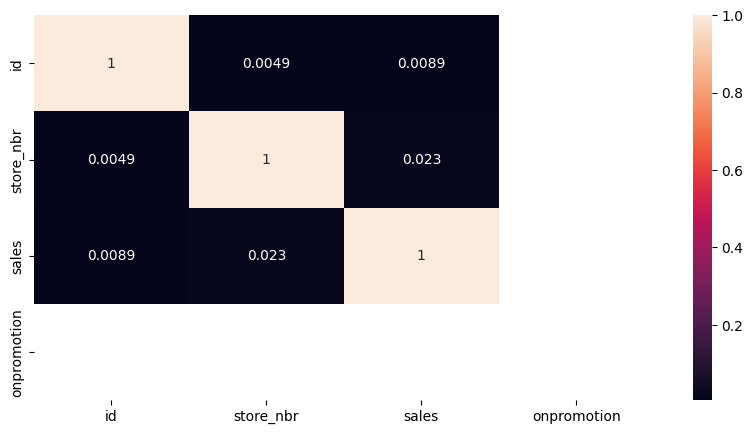

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [22]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import klib

2023-05-07 16:46:33,139 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-07 16:46:33,143 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-05-07 16:46:33,154 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


GridSpec(6, 2)

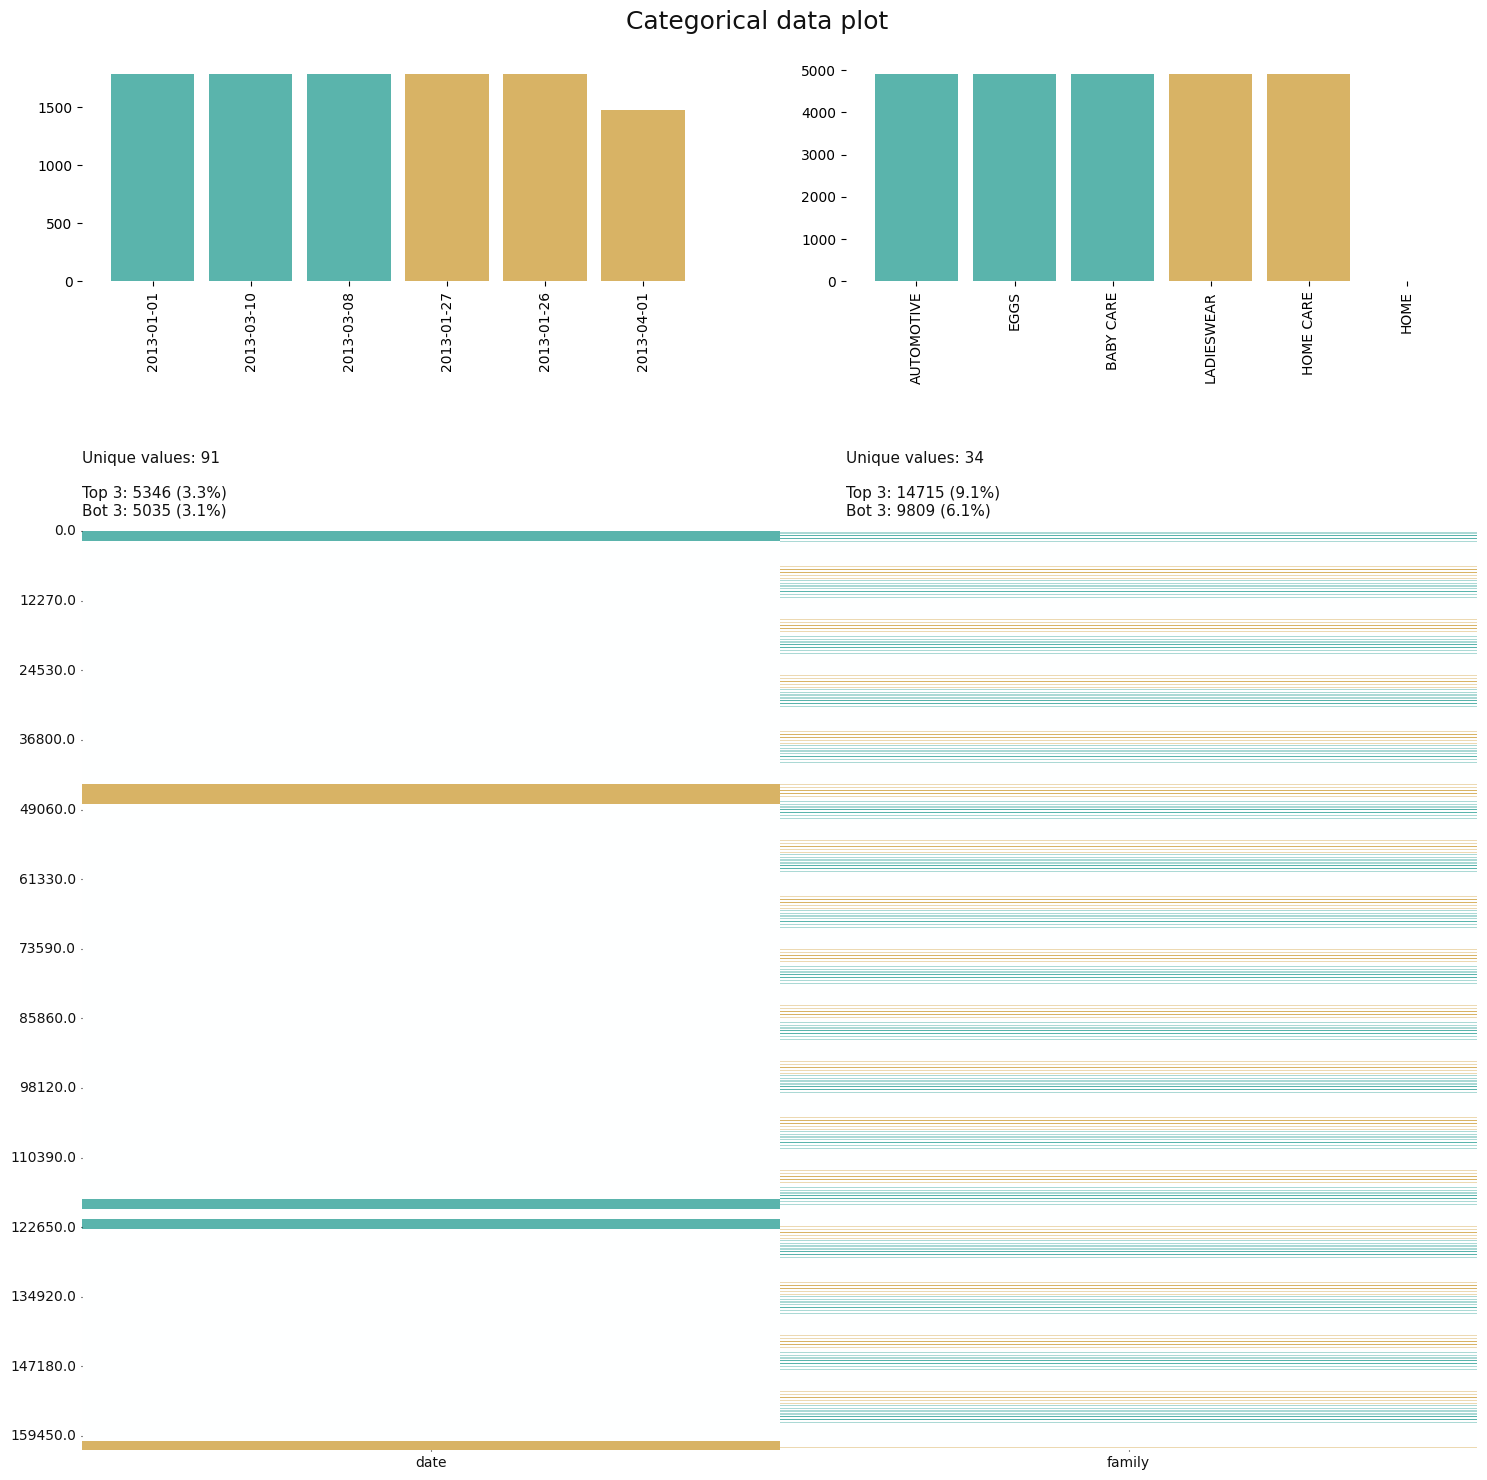

In [24]:
klib.cat_plot(df_train)

In [25]:
klib.corr_mat(df_train)

,id,store_nbr,sales,onpromotion
id,1.00,0.00,0.01,-
store_nbr,0.00,1.00,0.02,-
sales,0.01,0.02,1.00,-
onpromotion,-,-,-,-


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot: xlabel='sales', ylabel='Density'>

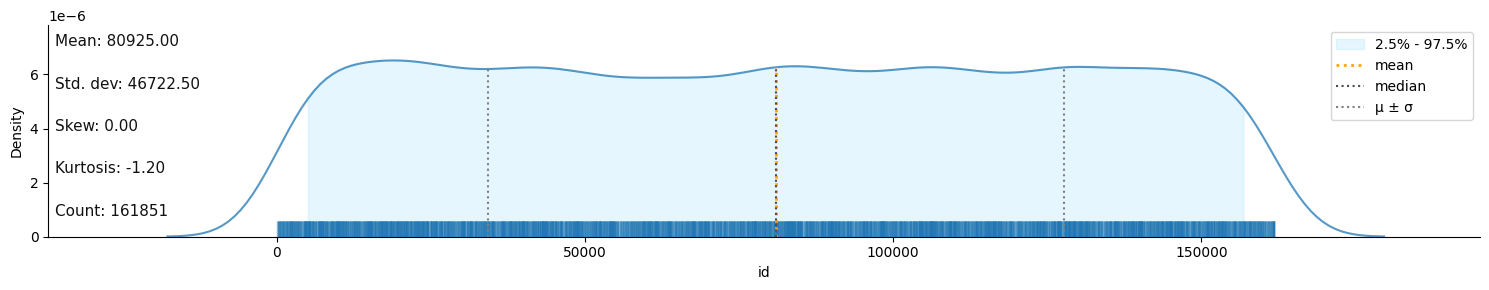

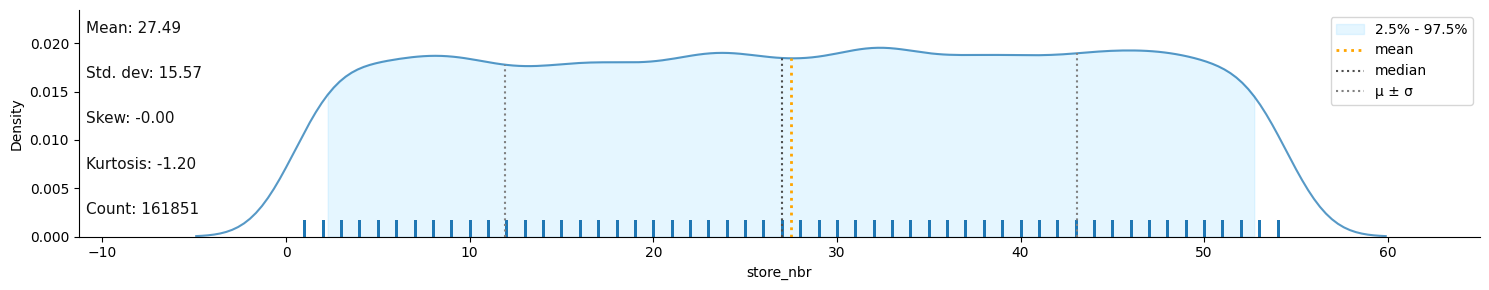

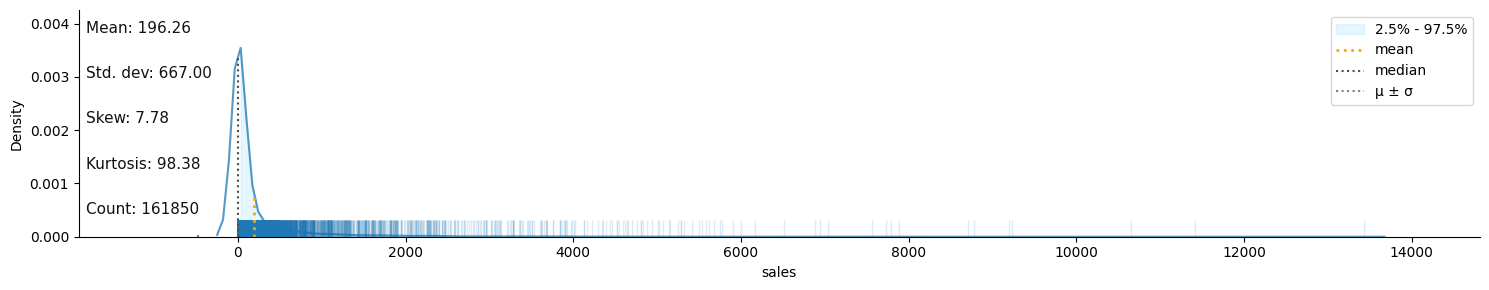

In [27]:
klib.dist_plot(df_train)

GridSpec(6, 6)

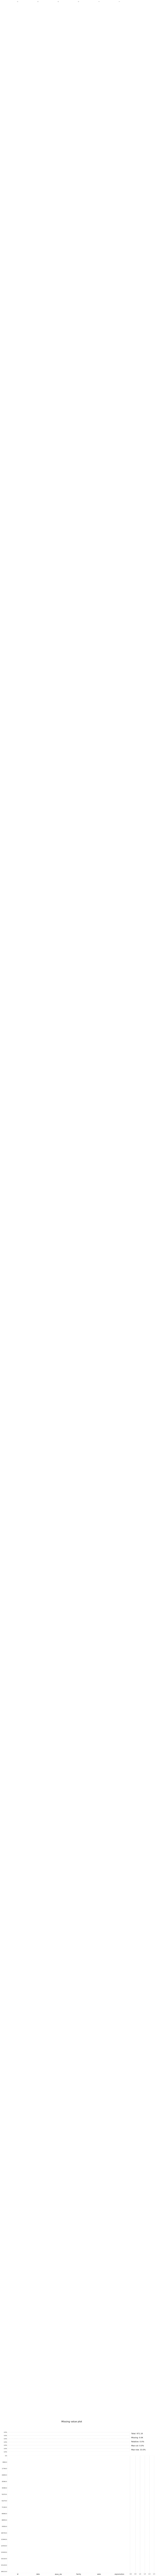

In [28]:
klib.missingval_plot(df_train)

In [29]:
klib.data_cleaning(df_train)

Shape of cleaned data: (161851, 6) - Remaining NAs: 2


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 5.09 MB (-68.69%)



,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0
...,...,...,...,...,...,...
161846,161846,2013-04-01,5,HARDWARE,0.0,0.0
161847,161847,2013-04-01,5,HOME AND KITCHEN I,0.0,0.0
161848,161848,2013-04-01,5,HOME AND KITCHEN II,0.0,0.0
161849,161849,2013-04-01,5,HOME APPLIANCES,1.0,0.0


In [30]:
klib.clean_column_names(df_train) 

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0
...,...,...,...,...,...,...
161846,161846,2013-04-01,5,HARDWARE,0.0,0.0
161847,161847,2013-04-01,5,HOME AND KITCHEN I,0.0,0.0
161848,161848,2013-04-01,5,HOME AND KITCHEN II,0.0,0.0
161849,161849,2013-04-01,5,HOME APPLIANCES,1.0,0.0


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161851 entries, 0 to 161850
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           161851 non-null  int64  
 1   date         161851 non-null  object 
 2   store_nbr    161851 non-null  int64  
 3   family       161851 non-null  object 
 4   sales        161850 non-null  float64
 5   onpromotion  161850 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.4+ MB


In [32]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161851 entries, 0 to 161850
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id           161851 non-null  int32   
 1   date         161851 non-null  category
 2   store_nbr    161851 non-null  int8    
 3   family       161851 non-null  category
 4   sales        161850 non-null  float32 
 5   onpromotion  161850 non-null  float32 
dtypes: category(2), float32(2), int32(1), int8(1)
memory usage: 2.3 MB


In [33]:
klib.mv_col_handling(df_train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0
...,...,...,...,...,...,...
161846,161846,2013-04-01,5,HARDWARE,0.0,0.0
161847,161847,2013-04-01,5,HOME AND KITCHEN I,0.0,0.0
161848,161848,2013-04-01,5,HOME AND KITCHEN II,0.0,0.0
161849,161849,2013-04-01,5,HOME APPLIANCES,1.0,0.0


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
df_train['id']= le.fit_transform(df_train['id'])
df_train['date']= le.fit_transform(df_train['date'])
df_train['family']= le.fit_transform(df_train['family'])
df_train['sales']= le.fit_transform(df_train['sales'])
df_train['onpromotion']= le.fit_transform(df_train['onpromotion'])

In [36]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,0,1,0,0,0
1,1,0,1,1,0,0
2,2,0,1,2,0,0
3,3,0,1,3,0,0
4,4,0,1,4,0,0
...,...,...,...,...,...,...
161846,161846,90,5,14,0,0
161847,161847,90,5,16,0,0
161848,161848,90,5,17,0,0
161849,161849,90,5,18,1,0


In [37]:
X=df_train.drop('onpromotion',axis=1)

In [65]:
Y=df_train['sales']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [40]:
X.describe()

,id,date,store_nbr,family,sales
count,161851.000000,161851.000000,161851.000000,161851.000000,161851.000000
mean,80925.000000,44.913532,27.493281,16.544569,3697.014513
std,46722.503547,26.218916,15.569197,9.954677,6428.703502
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40462.500000,22.000000,14.000000,8.000000,0.000000
50%,80925.000000,45.000000,27.000000,17.000000,0.000000
75%,121387.500000,68.000000,41.000000,25.000000,5040.500000
max,161850.000000,90.000000,54.000000,33.000000,22792.000000


In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [42]:
X_train_std= sc.fit_transform(X_train)

In [43]:
X_test_std= sc.transform(X_test)

In [44]:
X_train_std

array([[-0.5876023 , -0.56903681, -1.70043574,  0.54948807, -0.55886581],
       [ 1.69808216,  1.68094586, -1.31526371, -0.8570678 ,  2.04145814],
       [ 0.41596914,  0.42248098, -0.15974763,  0.85089289,  0.50654254],
       ...,
       [-0.54882561, -0.53090151, -1.1226777 ,  0.24808324, -0.57612254],
       [-0.66742407, -0.6834427 ,  1.70191717,  0.44901979, -0.57612254],
       [ 1.19471284,  1.18518696,  1.18835446, -0.05332159, -0.57612254]])

In [45]:
X_test_std

array([[-1.51586736, -1.52241929,  0.93157311, -1.05800435, -0.57612254],
       [-1.41871165, -1.40801339, -1.6362404 ,  0.95136117,  1.11146066],
       [ 0.86078823,  0.84196927, -1.18687303,  0.44901979, -0.57472334],
       ...,
       [ 1.4481951 ,  1.45213406,  0.09703372, -0.35472642, -0.57612254],
       [ 0.21731353,  0.23180448, -0.80170101, -0.25425814, -0.57596707],
       [-0.93308288, -0.9503898 , -1.31526371, -0.25425814, -0.57612254]])

In [66]:
Y_train

53481     0
160289    0
100377    0
132516    0
144501    0
         ..
148429    0
151535    0
55293     0
49751     0
136767    0
Name: onpromotion, Length: 129480, dtype: int64

In [67]:
Y_test

10104     0
14644     0
121163    0
79588     0
62637     0
         ..
139555    0
109405    0
148612    0
91094     0
37337     0
Name: onpromotion, Length: 32371, dtype: int64

In [48]:
import joblib

In [49]:
joblib.dump(sc,r'D:\Sales-Prediction-using-Machine-Learning-main (1)\Sales-Prediction-using-Machine-Learning-main\sc.sav')

['D:\\Sales-Prediction-using-Machine-Learning-main (1)\\Sales-Prediction-using-Machine-Learning-main\\sc.sav']

In [50]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [68]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [69]:
X_test.head()

,id,date,store_nbr,family,sales
10104,10104,5,42,6,0
14644,14644,8,2,26,10855
121163,121163,67,9,21,9
79588,79588,44,41,26,5696
62637,62637,35,17,3,18284


In [70]:
Y_pred_lr=lr.predict(X_test_std)

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.0
2.426302803557834e-05
3.3014768897026967e-05


In [72]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [73]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [74]:
Y_pred_rf= rf.predict(X_test_std)

In [75]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.0
3.954156498100151e-06
0.0006842039602033068


In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: -0.000 using {'n_estimators': 10}
-0.000 (0.000) with: {'n_estimators': 10}
-0.000 (0.000) with: {'n_estimators': 100}
-0.000 (0.000) with: {'n_estimators': 1000}


In [77]:
grid_search_forest.best_params_

{'n_estimators': 10}

In [78]:
grid_search_forest.best_score_

-7.723319791930194e-06

In [79]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [80]:
r2_score(Y_test,Y_pred_rf_grid)

0.0